Kiersten Wener and Eli Chesnut

We will be using the F1-Score. It is the best choice for our dog-vs-cat classification task because it balances precision and recall, making it ideal for scenarios where the dataset might be slightly imbalanced or when both types of errors—falsely classifying a cat as a dog or a dog as a cat—are equally important. While accuracy gives a broad sense of performance, it can be misleading in cases of imbalance. The F1-Score ensures that our model performs well not only in predicting the dominant class but also in identifying the minority class correctly, leading to a more reliable assessment of its real-world performance.

We want to minimize mis-identification, we want to get it right purposefully. This also will help in real world application when there might be an imbalance of testing data.

We will be using sh

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)




2.2.3
2.0.2


In [2]:
path_to_images = '/Users/elichesnut/Documents/GitHub/MLLab6/images'

images = []
labels = []
dog_breeds = ['american','wheaten','staffordshire','shiba','scottish','samoyed','saint','pug','pomeranian','newfoundland','miniature','leonberger','keeshond','japanese','havanese','great','german','english','chihuahua','boxer','beagle','basset']

for filename in os.listdir(path_to_images):
    if filename.endswith('.jpg'):
        img_path = os.path.join(path_to_images, filename)
        #resize the images
        img = Image.open(img_path).convert('RGB')
        img = img.resize((128, 128))
        images.append(np.array(img))#adds the individual image to the array of images 
        label = filename.split('_')[0] #this gets the breed name 
        if label in dog_breeds:
            label = 'dog'
        else:
            label = 'cat'
        labels.append(label) #appends the picture label to the label vector 

# combined = list(zip(images, labels))

# Select the first 1000 images and labels to reduce the size of the dataset with a randomized number of each breed
subset_images = images[:1000]
subset_labels = labels[:1000]


X_train, X_test, y_train, y_test = train_test_split(subset_images, subset_labels, test_size=0.2)




We can add a normalization layer to the sequential =

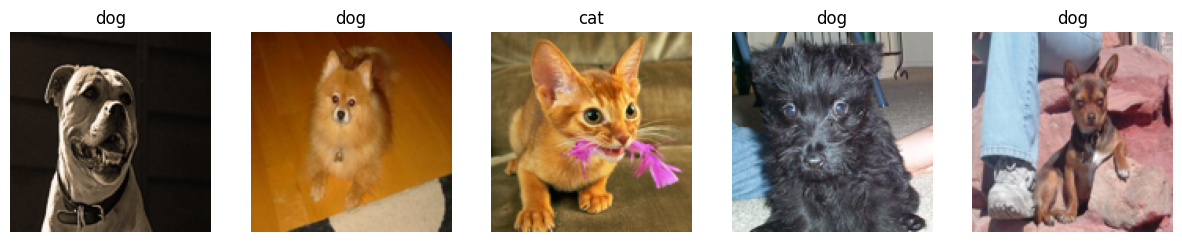

(128, 128, 3)


In [3]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(y_train[i])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 
print(subset_images[0].shape)

In [13]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model

cnn = Sequential(name='3x3_kernel')
cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(128,128,3)))


/Users/elichesnut/Documents/GitHub/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
